In [1]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pred_accident = pd.read_csv('/content/drive/My Drive/AIT/Thesis/pred_accident.csv')

In [3]:
pred_accident.head(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Casualty_Gender,Avg_Casualty_Age,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,1,1,2,12,E09000020,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,Majority Female,41.0,18,45
1,526530,178560,-0.178838,51.491836,1,3,1,1,2,12,E09000020,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,Majority Male,24.0,7,50
2,524610,181080,-0.205590,51.514910,1,3,1,1,2,12,E09000020,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,Majority Female,33.0,18,8
3,524420,181080,-0.208327,51.514952,1,3,1,1,3,12,E09000020,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,Majority Female,9.0,7,40
4,524630,179040,-0.206022,51.496572,1,2,2,1,6,12,E09000020,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,Majority Male,48.0,7,30
5,525480,179530,-0.193610,51.500788,1,3,2,1,5,12,E09000020,3,315,6,30,3,4,5,0,0,4,1,1,2,0,0,1,Majority Male,37.0,9,56
6,526890,178940,-0.173519,51.495171,1,3,2,1,5,12,E09000020,3,3218,6,30,6,2,3,3218,0,5,1,8,2,0,0,1,Majority Male,37.0,9,9
7,527590,178660,-0.163542,51.492497,1,3,2,1,1,12,E09000020,6,0,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,Majority Female,85.0,15,30
8,524170,180930,-0.211980,51.513659,1,3,2,1,6,12,E09000020,5,0,6,30,3,4,6,0,0,1,1,1,1,0,0,1,Majority Male,61.0,6,20
9,525010,181200,-0.199786,51.515900,1,3,2,2,3,12,E09000020,6,0,6,30,3,4,6,0,0,0,1,8,1,0,0,1,Majority Male,43.5,15,44


In [4]:
pred_accident_severity = pred_accident.drop(['Number_of_Vehicles','Number_of_Casualties', 'Local_Authority_(Highway)', 'Casualty_Gender', 'Avg_Casualty_Age'], 
                              axis = 1).reset_index(drop = True)

In [5]:
pred_accident_severity.head(10)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Hour,Min
0,525130,180050,-0.198465,51.505538,1,3,2,12,5,0,6,30,3,4,6,0,0,0,4,1,1,0,0,1,18,45
1,526530,178560,-0.178838,51.491836,1,3,2,12,6,0,6,30,3,4,3,3218,0,0,1,1,1,0,0,1,7,50
2,524610,181080,-0.205590,51.514910,1,3,2,12,4,415,6,30,2,4,6,0,0,1,4,2,2,0,0,1,18,8
3,524420,181080,-0.208327,51.514952,1,3,3,12,4,450,6,30,6,4,6,0,0,0,1,1,2,0,0,1,7,40
4,524630,179040,-0.206022,51.496572,1,2,6,12,3,315,6,30,6,2,3,3220,0,5,1,2,2,0,0,1,7,30
5,525480,179530,-0.193610,51.500788,1,3,5,12,3,315,6,30,3,4,5,0,0,4,1,1,2,0,0,1,9,56
6,526890,178940,-0.173519,51.495171,1,3,5,12,3,3218,6,30,6,2,3,3218,0,5,1,8,2,0,0,1,9,9
7,527590,178660,-0.163542,51.492497,1,3,1,12,6,0,6,30,0,-1,-1,0,0,0,1,1,1,0,0,1,15,30
8,524170,180930,-0.211980,51.513659,1,3,6,12,5,0,6,30,3,4,6,0,0,1,1,1,1,0,0,1,6,20
9,525010,181200,-0.199786,51.515900,1,3,3,12,6,0,6,30,3,4,6,0,0,0,1,8,1,0,0,1,15,44


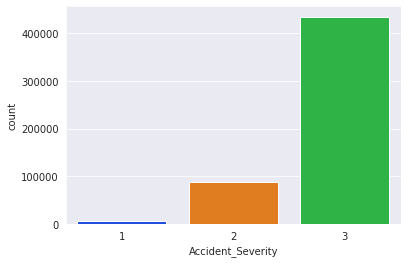

In [6]:
sns.set_style('darkgrid')
sns.set_palette('bright')
sns.countplot(x="Accident_Severity", data=pred_accident_severity)

In [7]:
pred_accident_severity['Accident_Severity'].value_counts()

3    435021
2     87427
1      6655
Name: Accident_Severity, dtype: int64

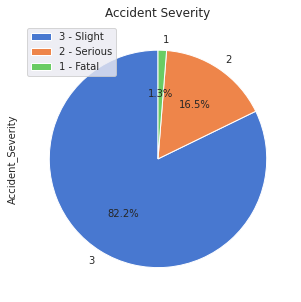

In [8]:
# Proportion of accident severities
sns.set_palette('muted')
pred_accident['Accident_Severity'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5),
                                              title = 'Accident Severity')
plt.legend(['3 - Slight', '2 - Serious', '1 - Fatal'], loc = 'best')

**Original Data**

In [9]:
X = pred_accident_severity.drop(['Accident_Severity'], axis = 1)
y = pred_accident_severity['Accident_Severity']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
Counter(y_train)

Counter({1: 4732, 2: 60886, 3: 304754})

In [12]:
Counter(y_test)

Counter({1: 1923, 2: 26541, 3: 130267})

In [13]:
# Decision Tree model
model_DTree = DecisionTreeClassifier()
model_DTree = model_DTree.fit(X_train, y_train)

In [14]:
y_pred = model_DTree.predict(X_test)

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6981370998733707


In [16]:
print(confusion_matrix(y_test, y_pred))

[[    58    454   1411]
 [   527   5464  20550]
 [  1813  23160 105294]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.02      0.03      0.03      1923
           2       0.19      0.21      0.20     26541
           3       0.83      0.81      0.82    130267

    accuracy                           0.70    158731
   macro avg       0.35      0.35      0.35    158731
weighted avg       0.71      0.70      0.70    158731



In [18]:
# Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred = rfc.predict(X_test)

In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.818119963964191


In [21]:
print(confusion_matrix(y_test, y_pred))

[[     3     43   1877]
 [     6    435  26100]
 [    13    831 129423]]


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.14      0.00      0.00      1923
           2       0.33      0.02      0.03     26541
           3       0.82      0.99      0.90    130267

    accuracy                           0.82    158731
   macro avg       0.43      0.34      0.31    158731
weighted avg       0.73      0.82      0.74    158731



In [23]:
# Naive Bayes model
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.818119963964191


In [25]:
print(confusion_matrix(y_test, y_pred))

[[     3     43   1877]
 [     6    435  26100]
 [    13    831 129423]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.14      0.00      0.00      1923
           2       0.33      0.02      0.03     26541
           3       0.82      0.99      0.90    130267

    accuracy                           0.82    158731
   macro avg       0.43      0.34      0.31    158731
weighted avg       0.73      0.82      0.74    158731



**Minority Class Oversampling using SMOTE**

In [27]:
# Oversampling the minority class in the data using SMOTE 
sm = SMOTE() 
X_over, y_over = sm.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, random_state=42)

In [29]:
Counter(y_train_over)

Counter({1: 304470, 2: 304235, 3: 304839})

In [30]:
Counter(y_test_over)

Counter({1: 130551, 2: 130786, 3: 130182})

In [31]:
# Decision Tree model
model_DTree_over = DecisionTreeClassifier()
model_DTree_over = model_DTree_over.fit(X_train_over, y_train_over)

In [32]:
y_pred_over = model_DTree_over.predict(X_test_over)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test_over, y_pred_over))

Accuracy: 0.8263481465778162


In [34]:
print(confusion_matrix(y_test_over, y_pred_over))

[[121999   6973   1579]
 [ 12101  97683  21002]
 [  2183  24150 103849]]


In [35]:
print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           1       0.90      0.93      0.91    130551
           2       0.76      0.75      0.75    130786
           3       0.82      0.80      0.81    130182

    accuracy                           0.83    391519
   macro avg       0.82      0.83      0.83    391519
weighted avg       0.82      0.83      0.83    391519



In [36]:
# Random Forest model
rfc_over = RandomForestClassifier()
rfc_over.fit(X_train_over,y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_pred_over = rfc_over.predict(X_test_over)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test_over, y_pred_over))

Accuracy: 0.9126147134621819


In [39]:
print(confusion_matrix(y_test_over, y_pred_over))

[[128117    730   1704]
 [  4543 101558  24685]
 [   126   2425 127631]]


In [40]:
print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           1       0.96      0.98      0.97    130551
           2       0.97      0.78      0.86    130786
           3       0.83      0.98      0.90    130182

    accuracy                           0.91    391519
   macro avg       0.92      0.91      0.91    391519
weighted avg       0.92      0.91      0.91    391519



In [41]:
# Naive Bayes model
gnb_model_over = GaussianNB().fit(X_train_over, y_train_over) 
y_pred_over = gnb_model_over.predict(X_test_over) 

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test_over, y_pred_over))

Accuracy: 0.46239390680912035


In [43]:
print(confusion_matrix(y_test_over, y_pred_over))

[[92520 23277 14754]
 [58759 43363 28664]
 [48131 36898 45153]]


In [44]:
print(classification_report(y_test_over, y_pred_over))

              precision    recall  f1-score   support

           1       0.46      0.71      0.56    130551
           2       0.42      0.33      0.37    130786
           3       0.51      0.35      0.41    130182

    accuracy                           0.46    391519
   macro avg       0.46      0.46      0.45    391519
weighted avg       0.46      0.46      0.45    391519



**Majority Class Undersampling using RandomUnderSampler**

In [45]:
# Undersampling the majority class in the data using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [46]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.3, random_state=42)

In [47]:
Counter(y_train_under)

Counter({1: 4664, 2: 4621, 3: 4690})

In [48]:
Counter(y_test_under)

Counter({1: 1991, 2: 2034, 3: 1965})

In [49]:
#Decision Tree model
model_DTree_under = DecisionTreeClassifier()
model_DTree_under = model_DTree_under.fit(X_train_under, y_train_under)

In [50]:
y_pred_under = model_DTree_under.predict(X_test_under)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))

Accuracy: 0.3911519198664441


In [52]:
print(confusion_matrix(y_test_under, y_pred_under))

[[877 574 540]
 [611 702 721]
 [558 643 764]]


In [53]:
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           1       0.43      0.44      0.43      1991
           2       0.37      0.35      0.36      2034
           3       0.38      0.39      0.38      1965

    accuracy                           0.39      5990
   macro avg       0.39      0.39      0.39      5990
weighted avg       0.39      0.39      0.39      5990



In [54]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

rfc_under = RandomForestClassifier()
rfc_under.fit(X_train_under,y_train_under)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_pred_under = rfc_under.predict(X_test_under)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))

Accuracy: 0.45559265442404007


In [57]:
print(confusion_matrix(y_test_under, y_pred_under))

[[1171  422  398]
 [ 640  624  770]
 [ 436  595  934]]


In [58]:
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           1       0.52      0.59      0.55      1991
           2       0.38      0.31      0.34      2034
           3       0.44      0.48      0.46      1965

    accuracy                           0.46      5990
   macro avg       0.45      0.46      0.45      5990
weighted avg       0.45      0.46      0.45      5990



In [59]:
#Naive Bayes model
gnb_model_under = GaussianNB().fit(X_train_under, y_train_under) 
y_pred_under = gnb_model_under.predict(X_test_under) 

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test_under, y_pred_under))

Accuracy: 0.440567612687813


In [61]:
print(confusion_matrix(y_test_under, y_pred_under))

[[1236  121  634]
 [ 749  183 1102]
 [ 580  165 1220]]


In [62]:
print(classification_report(y_test_under, y_pred_under))

              precision    recall  f1-score   support

           1       0.48      0.62      0.54      1991
           2       0.39      0.09      0.15      2034
           3       0.41      0.62      0.50      1965

    accuracy                           0.44      5990
   macro avg       0.43      0.44      0.39      5990
weighted avg       0.43      0.44      0.39      5990

